In [1]:
import numpy as np
import pandas as pd
import sklearn, sklearn.preprocessing, sklearn.model_selection, sklearn.linear_model, sklearn.metrics, sklearn.feature_selection, sklearn.ensemble
import matplotlib.pyplot as plt
import seaborn as sns

# Numbers display set-up
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# 1) Data Preparation

We are going to use following dataset to train a model for predicting a yearly salary (total compensation) when we are hiring a new employee. This model can help to HR department. Credit to Worksday's tutorial on ML Prague.

In [2]:
url = 'https://homel.vsb.cz/~pla06/files/ml/data/hr-data.csv'
try:
    df = pd.read_csv(url, index_col=0)
except Exception:
    import requests, io, urllib3
    urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
    resp = requests.get(url, verify=False, timeout=10)
    resp.raise_for_status()
    df = pd.read_csv(io.StringIO(resp.text), index_col=0)
df.head()

,compa_ratio_range,cost_center,country,current_rating,ethnicity,gender,generation,high_performer,high_potential,hiring_source,is_leader,is_manager,job_family_group,job_level,job_profile,length_of_service,location,management_level,region,single_job_family,tenure_category,total_compensation,age
compa_ratio,,,,,,,,,,,,,,,,,,,,,,,
1.545,Above Compa-Ratio,AMER - United States of America,United States of America,4 - Exceeds Expectations,Asian,Female,Generation X (1965-1980),False,False,Referral,True,True,Executive,M9,Executive Management - Chief Executive Officer,26.934,San Francisco,Chief Executive Officer,AMER,Executive Management,15+ Years,772400,57.000
1.021,At Compa-Ratio,AMER - United States of America,United States of America,3 - Meets Expectations,White,Male,Generation Z (1997 and onwards),False,True,Referral,False,False,Development,P2,IT - Product Development - P2 Business Analytics,1.844,New York,Individual Contributor,AMER,IT - Product Development,01-02 Years,68900,25.000
0.981,At Compa-Ratio,Global Support - Asia/Pac,South Korea,5 - Outstanding Performance,Asian,Male,Generation Y/Millenials (1981-1996),True,False,Recruiter,False,False,Development,P3,IT - Product Development - P3 Data Scientist,2.192,Seoul,Individual Contributor,APAC,IT - Product Development,02-05 Years,53200,33.000
1.342,Above Compa-Ratio,AMER - Canada,Canada,2 - Needs Improvement,Asian,Male,Generation X (1965-1980),False,True,Linkedin,False,False,Executive,P5,Executive Management - Principal Operations Ex...,18.518,Toronto,Executive Vice President,AMER,Executive Management,15+ Years,204600,45.000
1.290,Above Compa-Ratio,Global Support - Asia/Pac,South Korea,3 - Meets Expectations,Asian,Female,Generation Y/Millenials (1981-1996),False,False,Internal,False,False,Finance,P3,FA - Accounting - P3 Accounting Settlement Spe...,1.416,Seoul,Individual Contributor,APAC,FA - Accounting,01-02 Years,70000,32.000


In [3]:
df.head(3)

,compa_ratio_range,cost_center,country,current_rating,ethnicity,gender,generation,high_performer,high_potential,hiring_source,is_leader,is_manager,job_family_group,job_level,job_profile,length_of_service,location,management_level,region,single_job_family,tenure_category,total_compensation,age
compa_ratio,,,,,,,,,,,,,,,,,,,,,,,
1.545,Above Compa-Ratio,AMER - United States of America,United States of America,4 - Exceeds Expectations,Asian,Female,Generation X (1965-1980),False,False,Referral,True,True,Executive,M9,Executive Management - Chief Executive Officer,26.934,San Francisco,Chief Executive Officer,AMER,Executive Management,15+ Years,772400,57.000
1.021,At Compa-Ratio,AMER - United States of America,United States of America,3 - Meets Expectations,White,Male,Generation Z (1997 and onwards),False,True,Referral,False,False,Development,P2,IT - Product Development - P2 Business Analytics,1.844,New York,Individual Contributor,AMER,IT - Product Development,01-02 Years,68900,25.000
0.981,At Compa-Ratio,Global Support - Asia/Pac,South Korea,5 - Outstanding Performance,Asian,Male,Generation Y/Millenials (1981-1996),True,False,Recruiter,False,False,Development,P3,IT - Product Development - P3 Data Scientist,2.192,Seoul,Individual Contributor,APAC,IT - Product Development,02-05 Years,53200,33.000


In [4]:
df.describe(include="all")

,compa_ratio_range,cost_center,country,current_rating,ethnicity,gender,generation,high_performer,high_potential,hiring_source,is_leader,is_manager,job_family_group,job_level,job_profile,length_of_service,location,management_level,region,single_job_family,tenure_category,total_compensation,age
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000.000,5000,5000,5000,5000,5000,5000.000,5000.000
unique,3,5,6,5,5,2,4,2,2,6,2,2,5,13,90,NaN,19,6,3,11,6,NaN,NaN
top,Above Compa-Ratio,AMER - United States of America,United States of America,4 - Exceeds Expectations,White,Female,Generation Y/Millenials (1981-1996),False,False,Referral,False,False,Development,P4,Board Management - Senior Board Associate,NaN,San Francisco,Individual Contributor,AMER,IT - Product Development,05-10 Years,NaN,NaN
freq,3284,1275,1275,1013,2282,2500,3364,3992,4227,1531,4674,4409,1476,1334,242,NaN,876,3913,2515,1309,1359,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.997,NaN,NaN,NaN,NaN,NaN,131567.360,36.859
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.745,NaN,NaN,NaN,NaN,NaN,107949.422,10.741
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,24600.000,21.000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.595,NaN,NaN,NaN,NaN,NaN,67500.000,29.000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.699,NaN,NaN,NaN,NaN,NaN,104300.000,34.000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.648,NaN,NaN,NaN,NaN,NaN,152700.000,40.000


In [5]:
df.tenure_category.value_counts().index

Index(['05-10 Years', '02-05 Years', '10-15 Years', '15+ Years', '00-01 Years',
       '01-02 Years'],
      dtype='object', name='tenure_category')

In [6]:
df.replace(np.nan, "nan", regex=True, inplace=True)
categorical_columns = df.select_dtypes(include=["object"]).columns
categorical_columns

Index(['compa_ratio_range', 'cost_center', 'country', 'current_rating',
       'ethnicity', 'gender', 'generation', 'hiring_source',
       'job_family_group', 'job_level', 'job_profile', 'location',
       'management_level', 'region', 'single_job_family', 'tenure_category'],
      dtype='object')

In [7]:
ordinal_columns_category_order_dict = {
    'compa_ratio_range': ['Below Compa-Ratio', 'At Compa-Ratio', 'Above Compa-Ratio'],
    'current_rating': ['1 - Unsatisfactory', '2 - Needs Improvement', '3 - Meets Expectations', '4 - Exceeds Expectations', '5 - Outstanding Performance'],
    'tenure_category': ['00-01 Years', '01-02 Years', '02-05 Years', '05-10 Years', '10-15 Years', '15+ Years']
}

In [8]:
df_encoded = df.select_dtypes(exclude=["object"]).copy()
for col in ['high_performer', 'high_potential', 'is_leader', 'is_manager']:
    df_encoded[col] = df_encoded[col].astype(int)
df_encoded.head()

,high_performer,high_potential,is_leader,is_manager,length_of_service,total_compensation,age
compa_ratio,,,,,,,
1.545,0,0,1,1,26.934,772400,57.000
1.021,0,1,0,0,1.844,68900,25.000
0.981,1,0,0,0,2.192,53200,33.000
1.342,0,1,0,0,18.518,204600,45.000
1.290,0,0,0,0,1.416,70000,32.000


In [9]:
ordinal_encoder = sklearn.preprocessing.OrdinalEncoder(categories=[ordinal_columns_category_order_dict[column] for column in ordinal_columns_category_order_dict.keys()])
df_encoded = df_encoded.join(pd.DataFrame(ordinal_encoder.fit_transform(df[ordinal_columns_category_order_dict.keys()]), index=df.index, columns=ordinal_columns_category_order_dict.keys()))
df_encoded.head()

,high_performer,high_potential,is_leader,is_manager,length_of_service,total_compensation,age,compa_ratio_range,current_rating,tenure_category
compa_ratio,,,,,,,,,,
1.545,0,0,1,1,26.934,772400,57.000,2.000,3.000,5.000
1.545,0,0,1,1,26.934,772400,57.000,2.000,1.000,4.000
1.545,0,0,1,1,26.934,772400,57.000,2.000,3.000,5.000
1.021,0,1,0,0,1.844,68900,25.000,1.000,2.000,1.000
1.021,0,1,0,0,1.844,68900,25.000,1.000,3.000,3.000


In [10]:
nominal_columns = [column for column in categorical_columns if column not in ordinal_columns_category_order_dict.keys()]
df_encoded = df_encoded.join(pd.get_dummies(df[nominal_columns], prefix_sep="="))
df_encoded.head()

,high_performer,high_potential,is_leader,is_manager,length_of_service,total_compensation,age,compa_ratio_range,current_rating,tenure_category,cost_center=AMER - Canada,cost_center=AMER - United States of America,cost_center=EMEA - France,cost_center=EMEA - United Kingdom,cost_center=Global Support - Asia/Pac,country=Canada,country=France,country=Singapore,country=South Korea,country=United Kingdom,country=United States of America,ethnicity=American Indian or Alaska Native,ethnicity=Asian,ethnicity=Black or African American,ethnicity=Hispanic,ethnicity=White,gender=Female,gender=Male,generation=Baby Boomers (1946-1964),generation=Generation X (1965-1980),generation=Generation Y/Millenials (1981-1996),generation=Generation Z (1997 and onwards),hiring_source=Agency,hiring_source=Corporate Website,hiring_source=Internal,hiring_source=Linkedin,hiring_source=Recruiter,hiring_source=Referral,job_family_group=Development,job_family_group=Executive,job_family_group=Finance,job_family_group=Sales,job_family_group=Services,job_level=M2,job_level=M3,job_level=M4,job_level=M5,job_level=M6,job_level=M7,job_level=M8,job_level=M9,job_level=P1,job_level=P2,job_level=P3,job_level=P4,job_level=P5,job_profile=Board Management - Executive Vice President,job_profile=Board Management - Principal Board Associate,job_profile=Board Management - Senior Board Associate,job_profile=Board Management - Vice President,job_profile=Executive Management - Chief Executive Officer,job_profile=Executive Management - Executive Vice President,job_profile=Executive Management - Principal Operations Executive,job_profile=Executive Management - Senior Operations Executive,job_profile=Executive Management - Vice President,job_profile=FA - Accounting - P2 Accounting Settlement Specialist,job_profile=FA - Accounting - P2 Finance Analyst,job_profile=FA - Accounting - P3 Accounting Settlement Specialist,job_profile=FA - Accounting - P3 Finance Analyst,job_profile=FA - Accounting - Principal Accounting Settlement Specialist,job_profile=FA - Accounting - Principal Finance Analyst,job_profile=FA - Accounting - Senior Accounting Settlement Specialist,job_profile=FA - Accounting - Senior Finance Analyst,job_profile=FA - Management - Associate Manager,job_profile=FA - Management - Director,job_profile=FA - Management - Manager,job_profile=FA - Management - Senior Director,job_profile=FA - Management - Senior Manager,job_profile=Human Resources - Associate Manager,job_profile=Human Resources - Director,job_profile=Human Resources - Manager,job_profile=Human Resources - P2 Human Resources Analyst,job_profile=Human Resources - P2 Human Resources Consultant,job_profile=Human Resources - P3 Human Resources Analyst,job_profile=Human Resources - P3 Human Resources Consultant,job_profile=Human Resources - Principal Human Resources Analyst,job_profile=Human Resources - Principal Human Resources Consultant,job_profile=Human Resources - Senior Director,job_profile=Human Resources - Senior Human Resources Analyst,job_profile=Human Resources - Senior Human Resources Consultant,job_profile=Human Resources - Senior Manager,job_profile=Human Resources - Vice President,job_profile=IT - Product Development - P1 Business Analytics,job_profile=IT - Product Development - P1 Data Scientist,job_profile=IT - Product Development - P1 QA,job_profile=IT - Product Development - P1 Software Engineer,job_profile=IT - Product Development - P2 Business Analytics,job_profile=IT - Product Development - P2 Data Scientist,job_profile=IT - Product Development - P2 QA,job_profile=IT - Product Development - P2 Software Engineer,job_profile=IT - Product Development - P3 Business Analytics,job_profile=IT - Product Development - P3 Data Scientist,job_profile=IT - Product Development - P3 QA,job_profile=IT - Product Development - P3 Software Engineer,job_profile=IT - Product Development - Principal Business Analytics,job_profile=IT - Product Development - Principal Data Scientist,job_profile=IT - Product Development - Pri

In [11]:
df_encoded.shape

(318104, 185)

# 2) Linear Regression

There are a few assumptions associated with a linear regression model:

* Linearity: The relationship between X and Y is linear.
* Homoscedasticity: The variance of residual is the same for any value of X.
* No multicollinearity: There is no high correlations among two or more independent variables.
* Independence: Observations are independent of each other.
* Normality: For any fixed value of X, Y is normally distributed.

In [12]:
X_data = df_encoded.drop('total_compensation', axis=1)
y_data = df_encoded['total_compensation']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X_data, y_data, test_size=0.20, random_state=12
)
column_names = X_train.columns

In [13]:
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
residuals = y_test - y_pred

# Evaluate the model
rmse = sklearn.metrics.mean_squared_error(y_test, y_pred)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Percentage Error (MAPE): 0.19580867357560683
Root Mean Squared Error: 1611184031.8652582
R-squared: 0.7873436602649084


In [17]:
residuals.describe()

count     63621.000
mean        372.127
std       40138.147
min     -252739.653
25%      -16229.800
50%       -1144.899
75%       14173.785
max      417621.215
Name: total_compensation, dtype: float64

<Axes: xlabel='total_compensation', ylabel='Count'>

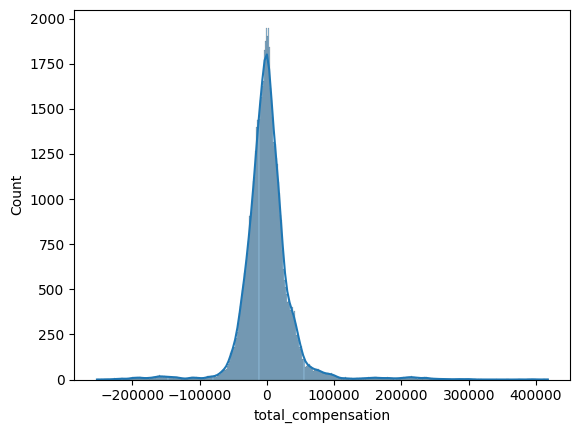

In [18]:
sns.histplot(residuals, kde=True)

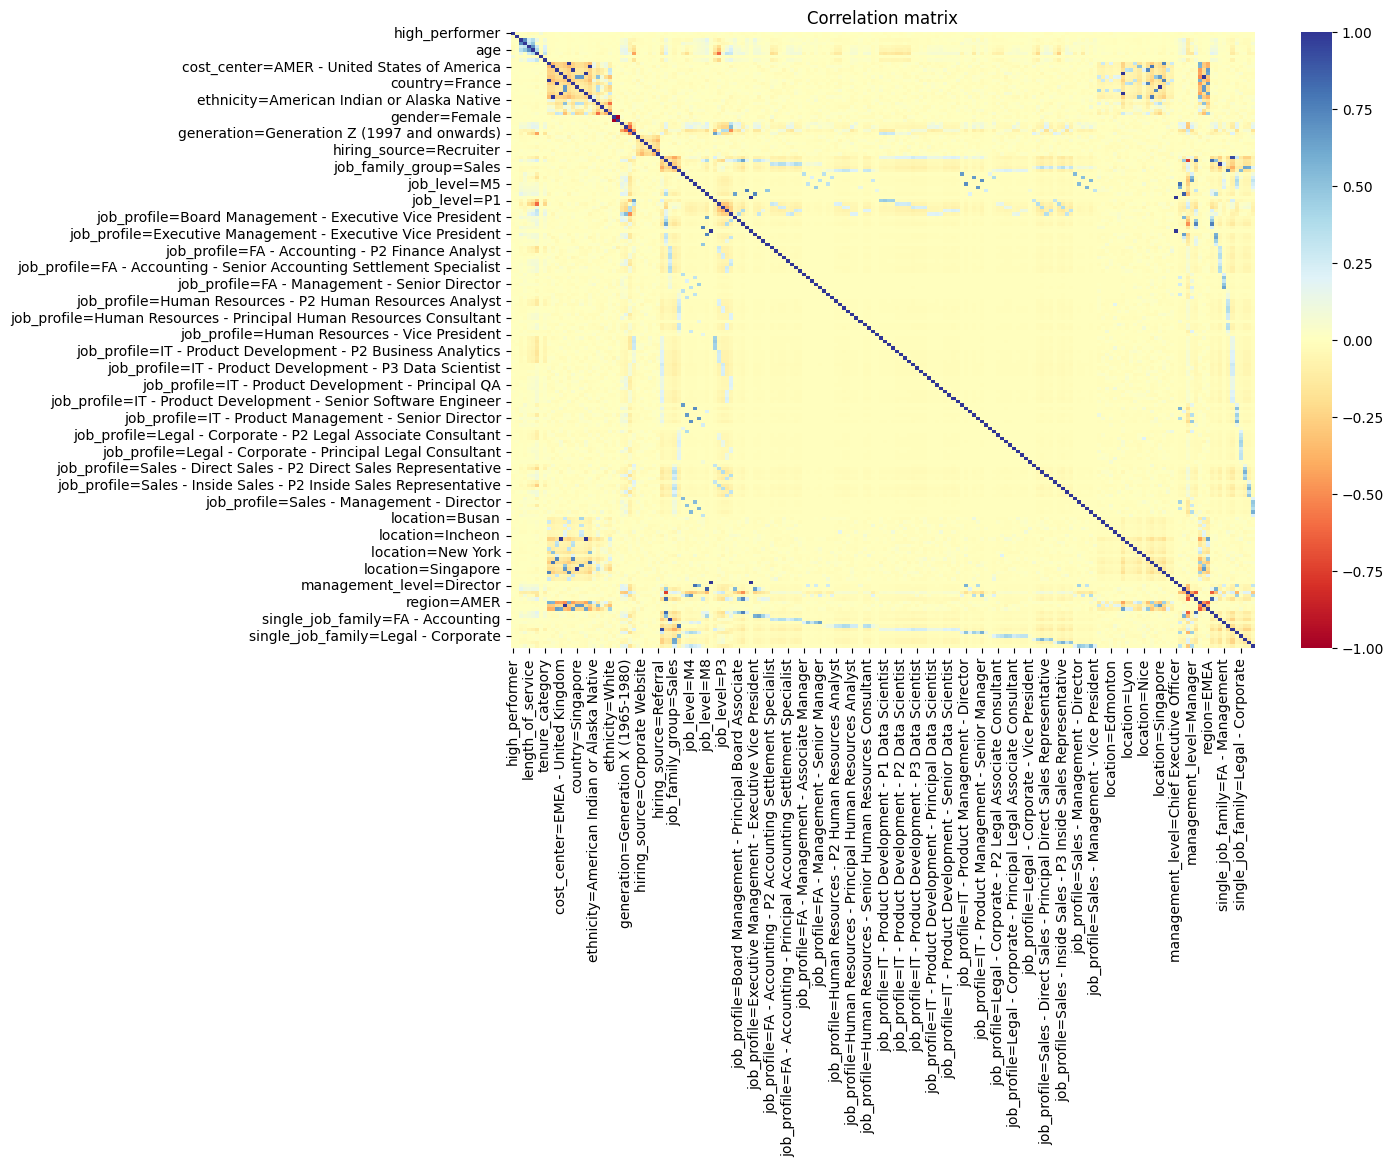

In [19]:
# We broke multicollinearity assumption by using all features
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=False, cmap='RdYlBu', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()
# NOTE: White line represents columns which contain only zeros

# 3) Orthogonal Matching Pursuit

In [21]:
n_coefs = 11
model = sklearn.linear_model.OrthogonalMatchingPursuit(n_nonzero_coefs=n_coefs)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
residuals = y_test - y_pred

# Evaluate the model
rmse = sklearn.metrics.mean_squared_error(y_test, y_pred)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Percentage Error (MAPE): 0.19568855354367007
Root Mean Squared Error: 1638866202.0295246
R-squared: 0.7836899566117995


What are the residuals?

In [22]:
residuals.describe()

count     63621.000
mean        375.376
std       40481.490
min     -254655.003
25%      -16459.321
50%       -1040.394
75%       14395.780
max      419796.863
Name: total_compensation, dtype: float64

How does the target attribute looks like?

<Axes: >

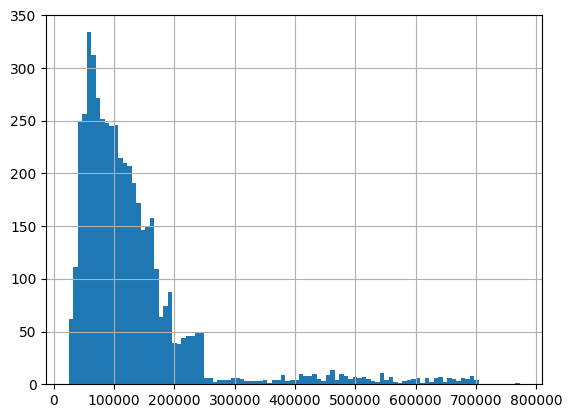

In [23]:
df['total_compensation'].hist(bins=100)

What is the model doing? There is a linear model inside :-).

In [24]:
y_pred = X_test_scaled @ model.coef_ + model.intercept_
y_pred[:5]

array([ 96704.50534469, 439287.06348136, 103566.00180499,  62864.58618489,
        85927.38341192])

### Use coefficients estimated by OMP to visualize their impact using (e.g.: seaborn, matplotlib). Think about the interpretation of the visualization, especially "age", "job_level -> M8" and "generation -> Baby Boomers (1946 - 1964)".

In [25]:
n_coefs = 11
model = sklearn.linear_model.OrthogonalMatchingPursuit(n_nonzero_coefs=n_coefs)
model.fit(X_train_scaled, y_train)

,n_nonzero_coefs,11
,tol,None
,fit_intercept,True
,precompute,'auto'


C:\Users\ajrac\AppData\Local\Temp\ipykernel_3768\9395927.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=selected_features, y=selected_features.index, palette=colors, dodge=False)
C:\Users\ajrac\AppData\Local\Temp\ipykernel_3768\9395927.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(selected_features.index)


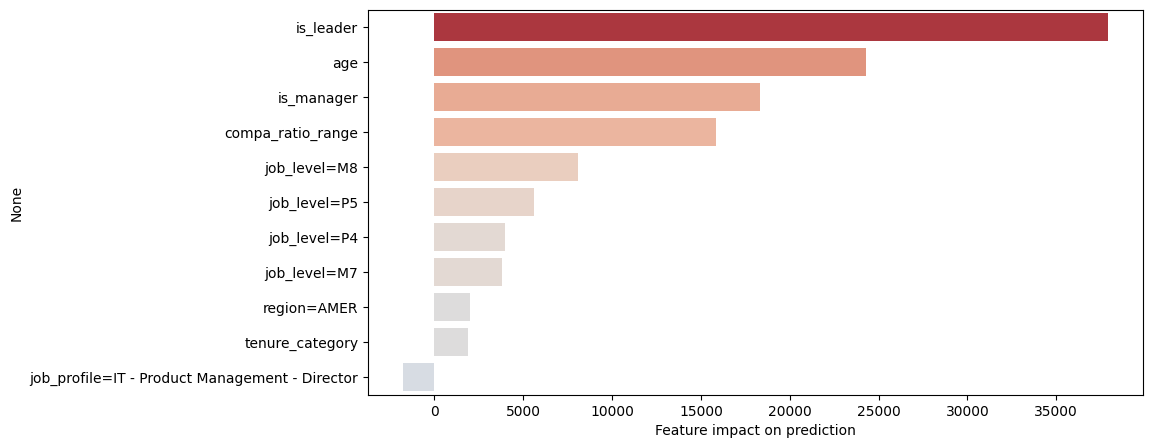

In [26]:
# Visualise the features that have been selected and their respective scores
feature_scores = pd.Series(model.coef_, index=X_data.columns).sort_values(ascending=False, key=lambda x: abs(x))
selected_features = feature_scores[:n_coefs]

f, ax = plt.subplots(figsize=(10, 5))
shades = 31
palette = sns.color_palette('coolwarm', shades)
minmax = np.max([-np.min(selected_features), np.max(selected_features)])
bins = np.linspace(-minmax, minmax, num=shades)
palette_indices = np.digitize(selected_features, bins) - 1
colors = [palette[idx] for idx in palette_indices]

ax = sns.barplot(x=selected_features, y=selected_features.index, palette=colors, dodge=False)
ax.set_yticklabels(selected_features.index)
ax.set_xlabel('Feature impact on prediction')
plt.show()

#### What you can tell about these features?

#### Lets see what a one year change in age can do

In [27]:
X_test.iloc[0:1]

,high_performer,high_potential,is_leader,is_manager,length_of_service,age,compa_ratio_range,current_rating,tenure_category,cost_center=AMER - Canada,cost_center=AMER - United States of America,cost_center=EMEA - France,cost_center=EMEA - United Kingdom,cost_center=Global Support - Asia/Pac,country=Canada,country=France,country=Singapore,country=South Korea,country=United Kingdom,country=United States of America,ethnicity=American Indian or Alaska Native,ethnicity=Asian,ethnicity=Black or African American,ethnicity=Hispanic,ethnicity=White,gender=Female,gender=Male,generation=Baby Boomers (1946-1964),generation=Generation X (1965-1980),generation=Generation Y/Millenials (1981-1996),generation=Generation Z (1997 and onwards),hiring_source=Agency,hiring_source=Corporate Website,hiring_source=Internal,hiring_source=Linkedin,hiring_source=Recruiter,hiring_source=Referral,job_family_group=Development,job_family_group=Executive,job_family_group=Finance,job_family_group=Sales,job_family_group=Services,job_level=M2,job_level=M3,job_level=M4,job_level=M5,job_level=M6,job_level=M7,job_level=M8,job_level=M9,job_level=P1,job_level=P2,job_level=P3,job_level=P4,job_level=P5,job_profile=Board Management - Executive Vice President,job_profile=Board Management - Principal Board Associate,job_profile=Board Management - Senior Board Associate,job_profile=Board Management - Vice President,job_profile=Executive Management - Chief Executive Officer,job_profile=Executive Management - Executive Vice President,job_profile=Executive Management - Principal Operations Executive,job_profile=Executive Management - Senior Operations Executive,job_profile=Executive Management - Vice President,job_profile=FA - Accounting - P2 Accounting Settlement Specialist,job_profile=FA - Accounting - P2 Finance Analyst,job_profile=FA - Accounting - P3 Accounting Settlement Specialist,job_profile=FA - Accounting - P3 Finance Analyst,job_profile=FA - Accounting - Principal Accounting Settlement Specialist,job_profile=FA - Accounting - Principal Finance Analyst,job_profile=FA - Accounting - Senior Accounting Settlement Specialist,job_profile=FA - Accounting - Senior Finance Analyst,job_profile=FA - Management - Associate Manager,job_profile=FA - Management - Director,job_profile=FA - Management - Manager,job_profile=FA - Management - Senior Director,job_profile=FA - Management - Senior Manager,job_profile=Human Resources - Associate Manager,job_profile=Human Resources - Director,job_profile=Human Resources - Manager,job_profile=Human Resources - P2 Human Resources Analyst,job_profile=Human Resources - P2 Human Resources Consultant,job_profile=Human Resources - P3 Human Resources Analyst,job_profile=Human Resources - P3 Human Resources Consultant,job_profile=Human Resources - Principal Human Resources Analyst,job_profile=Human Resources - Principal Human Resources Consultant,job_profile=Human Resources - Senior Director,job_profile=Human Resources - Senior Human Resources Analyst,job_profile=Human Resources - Senior Human Resources Consultant,job_profile=Human Resources - Senior Manager,job_profile=Human Resources - Vice President,job_profile=IT - Product Development - P1 Business Analytics,job_profile=IT - Product Development - P1 Data Scientist,job_profile=IT - Product Development - P1 QA,job_profile=IT - Product Development - P1 Software Engineer,job_profile=IT - Product Development - P2 Business Analytics,job_profile=IT - Product Development - P2 Data Scientist,job_profile=IT - Product Development - P2 QA,job_profile=IT - Product Development - P2 Software Engineer,job_profile=IT - Product Development - P3 Business Analytics,job_profile=IT - Product Development - P3 Data Scientist,job_profile=IT - Product Development - P3 QA,job_profile=IT - Product Development - P3 Software Engineer,job_profile=IT - Product Development - Principal Business Analytics,job_profile=IT - Product Development - Principal Data Scientist,job_profile=IT - Product Development - Principal QA,job_profi

In [28]:
pd.DataFrame(X_test_scaled[0:1, :], columns=X_test.columns)

,high_performer,high_potential,is_leader,is_manager,length_of_service,age,compa_ratio_range,current_rating,tenure_category,cost_center=AMER - Canada,cost_center=AMER - United States of America,cost_center=EMEA - France,cost_center=EMEA - United Kingdom,cost_center=Global Support - Asia/Pac,country=Canada,country=France,country=Singapore,country=South Korea,country=United Kingdom,country=United States of America,ethnicity=American Indian or Alaska Native,ethnicity=Asian,ethnicity=Black or African American,ethnicity=Hispanic,ethnicity=White,gender=Female,gender=Male,generation=Baby Boomers (1946-1964),generation=Generation X (1965-1980),generation=Generation Y/Millenials (1981-1996),generation=Generation Z (1997 and onwards),hiring_source=Agency,hiring_source=Corporate Website,hiring_source=Internal,hiring_source=Linkedin,hiring_source=Recruiter,hiring_source=Referral,job_family_group=Development,job_family_group=Executive,job_family_group=Finance,job_family_group=Sales,job_family_group=Services,job_level=M2,job_level=M3,job_level=M4,job_level=M5,job_level=M6,job_level=M7,job_level=M8,job_level=M9,job_level=P1,job_level=P2,job_level=P3,job_level=P4,job_level=P5,job_profile=Board Management - Executive Vice President,job_profile=Board Management - Principal Board Associate,job_profile=Board Management - Senior Board Associate,job_profile=Board Management - Vice President,job_profile=Executive Management - Chief Executive Officer,job_profile=Executive Management - Executive Vice President,job_profile=Executive Management - Principal Operations Executive,job_profile=Executive Management - Senior Operations Executive,job_profile=Executive Management - Vice President,job_profile=FA - Accounting - P2 Accounting Settlement Specialist,job_profile=FA - Accounting - P2 Finance Analyst,job_profile=FA - Accounting - P3 Accounting Settlement Specialist,job_profile=FA - Accounting - P3 Finance Analyst,job_profile=FA - Accounting - Principal Accounting Settlement Specialist,job_profile=FA - Accounting - Principal Finance Analyst,job_profile=FA - Accounting - Senior Accounting Settlement Specialist,job_profile=FA - Accounting - Senior Finance Analyst,job_profile=FA - Management - Associate Manager,job_profile=FA - Management - Director,job_profile=FA - Management - Manager,job_profile=FA - Management - Senior Director,job_profile=FA - Management - Senior Manager,job_profile=Human Resources - Associate Manager,job_profile=Human Resources - Director,job_profile=Human Resources - Manager,job_profile=Human Resources - P2 Human Resources Analyst,job_profile=Human Resources - P2 Human Resources Consultant,job_profile=Human Resources - P3 Human Resources Analyst,job_profile=Human Resources - P3 Human Resources Consultant,job_profile=Human Resources - Principal Human Resources Analyst,job_profile=Human Resources - Principal Human Resources Consultant,job_profile=Human Resources - Senior Director,job_profile=Human Resources - Senior Human Resources Analyst,job_profile=Human Resources - Senior Human Resources Consultant,job_profile=Human Resources - Senior Manager,job_profile=Human Resources - Vice President,job_profile=IT - Product Development - P1 Business Analytics,job_profile=IT - Product Development - P1 Data Scientist,job_profile=IT - Product Development - P1 QA,job_profile=IT - Product Development - P1 Software Engineer,job_profile=IT - Product Development - P2 Business Analytics,job_profile=IT - Product Development - P2 Data Scientist,job_profile=IT - Product Development - P2 QA,job_profile=IT - Product Development - P2 Software Engineer,job_profile=IT - Product Development - P3 Business Analytics,job_profile=IT - Product Development - P3 Data Scientist,job_profile=IT - Product Development - P3 QA,job_profile=IT - Product Development - P3 Software Engineer,job_profile=IT - Product Development - Principal Business Analytics,job_profile=IT - Product Development - Principal Data Scientist,job_profile=IT - Product Development - Principal QA,job_profi

In [29]:
X_new_entry = X_test.iloc[0:1].copy()
X_new_entry['age'] += 1

In [30]:
pd.DataFrame(scaler.transform(X_new_entry), columns=X_test.columns)

,high_performer,high_potential,is_leader,is_manager,length_of_service,age,compa_ratio_range,current_rating,tenure_category,cost_center=AMER - Canada,cost_center=AMER - United States of America,cost_center=EMEA - France,cost_center=EMEA - United Kingdom,cost_center=Global Support - Asia/Pac,country=Canada,country=France,country=Singapore,country=South Korea,country=United Kingdom,country=United States of America,ethnicity=American Indian or Alaska Native,ethnicity=Asian,ethnicity=Black or African American,ethnicity=Hispanic,ethnicity=White,gender=Female,gender=Male,generation=Baby Boomers (1946-1964),generation=Generation X (1965-1980),generation=Generation Y/Millenials (1981-1996),generation=Generation Z (1997 and onwards),hiring_source=Agency,hiring_source=Corporate Website,hiring_source=Internal,hiring_source=Linkedin,hiring_source=Recruiter,hiring_source=Referral,job_family_group=Development,job_family_group=Executive,job_family_group=Finance,job_family_group=Sales,job_family_group=Services,job_level=M2,job_level=M3,job_level=M4,job_level=M5,job_level=M6,job_level=M7,job_level=M8,job_level=M9,job_level=P1,job_level=P2,job_level=P3,job_level=P4,job_level=P5,job_profile=Board Management - Executive Vice President,job_profile=Board Management - Principal Board Associate,job_profile=Board Management - Senior Board Associate,job_profile=Board Management - Vice President,job_profile=Executive Management - Chief Executive Officer,job_profile=Executive Management - Executive Vice President,job_profile=Executive Management - Principal Operations Executive,job_profile=Executive Management - Senior Operations Executive,job_profile=Executive Management - Vice President,job_profile=FA - Accounting - P2 Accounting Settlement Specialist,job_profile=FA - Accounting - P2 Finance Analyst,job_profile=FA - Accounting - P3 Accounting Settlement Specialist,job_profile=FA - Accounting - P3 Finance Analyst,job_profile=FA - Accounting - Principal Accounting Settlement Specialist,job_profile=FA - Accounting - Principal Finance Analyst,job_profile=FA - Accounting - Senior Accounting Settlement Specialist,job_profile=FA - Accounting - Senior Finance Analyst,job_profile=FA - Management - Associate Manager,job_profile=FA - Management - Director,job_profile=FA - Management - Manager,job_profile=FA - Management - Senior Director,job_profile=FA - Management - Senior Manager,job_profile=Human Resources - Associate Manager,job_profile=Human Resources - Director,job_profile=Human Resources - Manager,job_profile=Human Resources - P2 Human Resources Analyst,job_profile=Human Resources - P2 Human Resources Consultant,job_profile=Human Resources - P3 Human Resources Analyst,job_profile=Human Resources - P3 Human Resources Consultant,job_profile=Human Resources - Principal Human Resources Analyst,job_profile=Human Resources - Principal Human Resources Consultant,job_profile=Human Resources - Senior Director,job_profile=Human Resources - Senior Human Resources Analyst,job_profile=Human Resources - Senior Human Resources Consultant,job_profile=Human Resources - Senior Manager,job_profile=Human Resources - Vice President,job_profile=IT - Product Development - P1 Business Analytics,job_profile=IT - Product Development - P1 Data Scientist,job_profile=IT - Product Development - P1 QA,job_profile=IT - Product Development - P1 Software Engineer,job_profile=IT - Product Development - P2 Business Analytics,job_profile=IT - Product Development - P2 Data Scientist,job_profile=IT - Product Development - P2 QA,job_profile=IT - Product Development - P2 Software Engineer,job_profile=IT - Product Development - P3 Business Analytics,job_profile=IT - Product Development - P3 Data Scientist,job_profile=IT - Product Development - P3 QA,job_profile=IT - Product Development - P3 Software Engineer,job_profile=IT - Product Development - Principal Business Analytics,job_profile=IT - Product Development - Principal Data Scientist,job_profile=IT - Product Development - Principal QA,job_profi

In [31]:
y_test[0:1]

C:\Users\ajrac\AppData\Local\Temp\ipykernel_3768\180392485.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  y_test[0:1]


KeyError: 0

In [32]:
model.predict(X_test_scaled[0:1, :])

array([96704.50534469])

In [33]:
model.predict(scaler.transform(X_new_entry))

array([99174.00786415])

## Run again Linear Regression only for selected features. Did the feature selection resolves original problem?

In [34]:
selected_features.index

Index(['is_leader', 'age', 'is_manager', 'compa_ratio_range', 'job_level=M8',
       'job_level=P5', 'job_level=P4', 'job_level=M7', 'region=AMER',
       'tenure_category', 'job_profile=IT - Product Management - Director'],
      dtype='object')

In [36]:
model = sklearn.linear_model.LinearRegression()
model.fit(pd.DataFrame(X_train_scaled, columns=X_train.columns)[selected_features.index], y_train)
y_pred = model.predict(pd.DataFrame(X_test_scaled, columns=X_test.columns)[selected_features.index])
residuals = y_test - y_pred

# Evaluate the model
rmse = sklearn.metrics.mean_squared_error(y_test, y_pred)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Percentage Error (MAPE): 0.19568855354366388
Root Mean Squared Error: 1638866202.0295599
R-squared: 0.7836899566117949


# 3) Random Forest and Boruta feature selection

* https://medium.com/geekculture/boruta-feature-selection-explained-in-python-7ae8bf4aa1e7

In [37]:
# Install package not available in Colab by default
# !pip install boruta

### Specify a base RF model and use it to run Boruta feature selection

In [38]:
from boruta import BorutaPy

In [39]:
# Base RF model specification
rf = sklearn.ensemble.RandomForestRegressor(max_depth=20, random_state=123)

In [40]:
# Boruta feature search
feat_selector = BorutaPy(
    verbose=2,
    estimator=rf,
    n_estimators=20,
    max_iter=25,
    random_state=123
)

feat_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 25
Confirmed: 	0
Tentative: 	184
Rejected: 	0
Iteration: 	2 / 25
Confirmed: 	0
Tentative: 	184
Rejected: 	0
Iteration: 	3 / 25
Confirmed: 	0
Tentative: 	184
Rejected: 	0
Iteration: 	4 / 25
Confirmed: 	0
Tentative: 	184
Rejected: 	0
Iteration: 	5 / 25
Confirmed: 	0
Tentative: 	184
Rejected: 	0
Iteration: 	6 / 25
Confirmed: 	0
Tentative: 	184
Rejected: 	0
Iteration: 	7 / 25
Confirmed: 	0
Tentative: 	184
Rejected: 	0
Iteration: 	8 / 25
Confirmed: 	37
Tentative: 	21
Rejected: 	126
Iteration: 	9 / 25
Confirmed: 	37
Tentative: 	21
Rejected: 	126
Iteration: 	10 / 25
Confirmed: 	37
Tentative: 	21
Rejected: 	126
Iteration: 	11 / 25
Confirmed: 	37
Tentative: 	21
Rejected: 	126
Iteration: 	12 / 25
Confirmed: 	39
Tentative: 	19
Rejected: 	126
Iteration: 	13 / 25
Confirmed: 	39
Tentative: 	19
Rejected: 	126
Iteration: 	14 / 25
Confirmed: 	39
Tentative: 	18
Rejected: 	127
Iteration: 	15 / 25
Confirmed: 	39
Tentative: 	18
Rejected: 	127
Iteration: 	16 / 25
Confirmed: 	40
Tentative: 	1

,estimator,RandomForestR...0x1FBC86C3340)
,n_estimators,20
,perc,100
,alpha,0.05
,two_step,True
,max_iter,25
,random_state,RandomState(M... 0x1FBC86C3340
,verbose,2
,early_stopping,False
,n_iter_no_change,20
,n_estimators,20


In [41]:
# Get the list of selected features
boruta_selected = []

for i in range(len(feat_selector.support_)):
    if (feat_selector.support_[i] or feat_selector.support_weak_[i]):
        boruta_selected.append(X_train.columns[i])
        print(X_train.columns[i])

high_performer
high_potential
is_leader
is_manager
length_of_service
age
compa_ratio_range
tenure_category
ethnicity=American Indian or Alaska Native
ethnicity=Asian
ethnicity=Black or African American
ethnicity=Hispanic
ethnicity=White
gender=Female
gender=Male
generation=Baby Boomers (1946-1964)
generation=Generation X (1965-1980)
generation=Generation Y/Millenials (1981-1996)
hiring_source=Agency
hiring_source=Corporate Website
hiring_source=Internal
hiring_source=Linkedin
hiring_source=Recruiter
hiring_source=Referral
job_family_group=Development
job_family_group=Sales
job_level=M4
job_level=M5
job_level=M7
job_level=M8
job_level=P3
job_level=P4
job_level=P5
job_profile=FA - Accounting - Principal Accounting Settlement Specialist
job_profile=FA - Accounting - Principal Finance Analyst
location=Marseille
location=Paris
location=San Francisco
location=Toulouse
management_level=Executive Vice President
region=AMER
region=EMEA
single_job_family=Board Management
single_job_family=Human 

In [42]:
print('Number of selected features: ', len(boruta_selected))

Number of selected features:  45


### Run RF model with features selected by Boruta

In [43]:
# Get subsets of explanatory variables only with features that were selected
X_filtered_train = X_train[boruta_selected]
X_filtered_test = X_test[boruta_selected]

In [44]:
# Model specification 
rf = sklearn.ensemble.RandomForestRegressor(n_estimators=50, max_depth=20, random_state=123)

# Fit the model
rf.fit(X_filtered_train, y_train)

# Get predictions
y_pred_BR_sel = rf.predict(X_filtered_test)

In [46]:
rmse = sklearn.metrics.mean_squared_error(y_test, y_pred_BR_sel)
r2 = sklearn.metrics.r2_score(y_test, y_pred_BR_sel)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred_BR_sel)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Percentage Error (MAPE): 0.04432151058655241
Root Mean Squared Error: 108799968.98613389
R-squared: 0.985639751443479


### Run RF model with all features

In [47]:
# Model specification 
rf = sklearn.ensemble.RandomForestRegressor(n_estimators=50, max_depth=20, random_state=123)

# Fit the model
rf.fit(X_train, y_train)

# Get predictions
y_pred_rf = rf.predict(X_test)

In [49]:
rmse = sklearn.metrics.mean_squared_error(y_test, y_pred_rf)
r2 = sklearn.metrics.r2_score(y_test, y_pred_rf)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred_rf)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Percentage Error (MAPE): 0.04945991694063597
Root Mean Squared Error: 119604465.43576393
R-squared: 0.9842136917121154


# Tasks
## Task 1: Use a *feature_importance* param in Random Forest (RF) for feature selection
1. Fit RF model without feature selection
2. Select the most important features using variable importance scores
    - Visualize the value of *feature_importance* for attributes
3. Fit the RF model again, now with selected features only

## Task 2: Summarize the insights gained in this analysis
Try some other regression model. You can choose different algorithm or different parameters.

Create a conlusion for this analysis. You can write about something from following list:
- Report the prediction scores achived by various models.
- What features were found important when solving this regression task?

Imagine, you are presenting these results to HR deparment team. Did you get any relevant information for that presentation in this analysis?

In [50]:
rf_all = sklearn.ensemble.RandomForestRegressor(n_estimators=200, max_depth=20, random_state=123, n_jobs=-1)
rf_all.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
feat_imp = pd.Series(rf_all.feature_importances_, index=X_train.columns).sort_values(ascending=False)
display(feat_imp.head(30))

is_leader                                                                  0.569
age                                                                        0.245
length_of_service                                                          0.068
compa_ratio_range                                                          0.046
job_level=M8                                                               0.010
is_manager                                                                 0.009
high_potential                                                             0.005
high_performer                                                             0.005
job_level=M5                                                               0.004
job_level=P3                                                               0.004
job_level=M7                                                               0.002
region=AMER                                                                0.002
management_level=Executive V

C:\Users\ajrac\AppData\Local\Temp\ipykernel_3768\2661208732.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.iloc[:top_plot].values, y=feat_imp.iloc[:top_plot].index, palette="viridis")


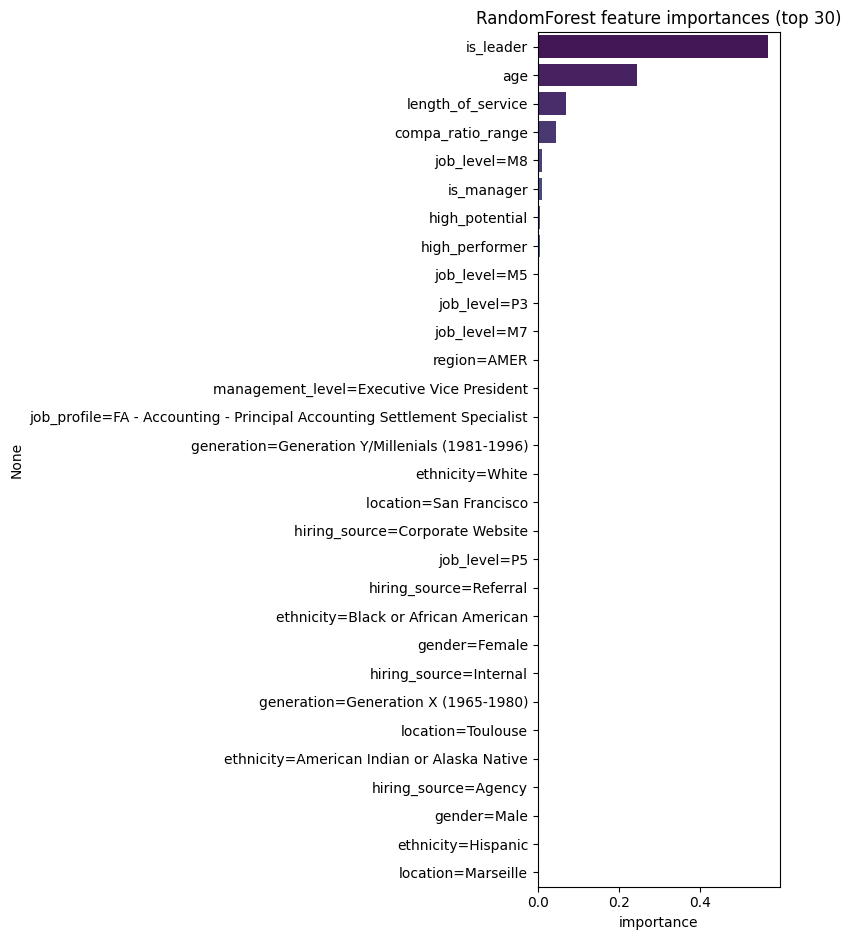

In [52]:
top_plot = min(30, len(feat_imp))
plt.figure(figsize=(8, top_plot * 0.25 + 2))
sns.barplot(x=feat_imp.iloc[:top_plot].values, y=feat_imp.iloc[:top_plot].index, palette="viridis")
plt.title("RandomForest feature importances (top {})".format(top_plot))
plt.xlabel("importance")
plt.tight_layout()
plt.show()

In [53]:
top_k = 15
top_features = feat_imp.index[:top_k].tolist()
print("Top {} features:".format(top_k), top_features)

Top 15 features: ['is_leader', 'age', 'length_of_service', 'compa_ratio_range', 'job_level=M8', 'is_manager', 'high_potential', 'high_performer', 'job_level=M5', 'job_level=P3', 'job_level=M7', 'region=AMER', 'management_level=Executive Vice President', 'job_profile=FA - Accounting - Principal Accounting Settlement Specialist', 'generation=Generation Y/Millenials (1981-1996)']


In [55]:
y_pred_all = rf_all.predict(X_test)
rmse_all = sklearn.metrics.mean_squared_error(y_test, y_pred_all)  # MSE
r2_all = sklearn.metrics.r2_score(y_test, y_pred_all)
mape_all = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred_all)

In [56]:
rf_sel = sklearn.ensemble.RandomForestRegressor(n_estimators=200, max_depth=20, random_state=123, n_jobs=-1)
rf_sel.fit(X_train[top_features], y_train)
y_pred_sel = rf_sel.predict(X_test[top_features])

In [57]:
rmse_sel = sklearn.metrics.mean_squared_error(y_test, y_pred_sel)
r2_sel = sklearn.metrics.r2_score(y_test, y_pred_sel)
mape_sel = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred_sel)

In [58]:
results = pd.DataFrame([
    ["All features", len(X_train.columns), rmse_all, r2_all, mape_all],
    ["Top {}".format(top_k), top_k, rmse_sel, r2_sel, mape_sel]
], columns=["Model", "n_features", "MSE", "R2", "MAPE"])
display(results)

,Model,n_features,MSE,R2,MAPE
0,All features,184,117919677.752,0.984,0.049
1,Top 15,15,96076586.529,0.987,0.041


Výše platu nejvíce záleží na tom, jestli je to je leader a na věku